### Student Information
Name:Iuan Kai Fang

Student ID: 108003854

GitHub ID: s108003854

Kaggle name: Iuan Kai Fang

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here


In [1]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

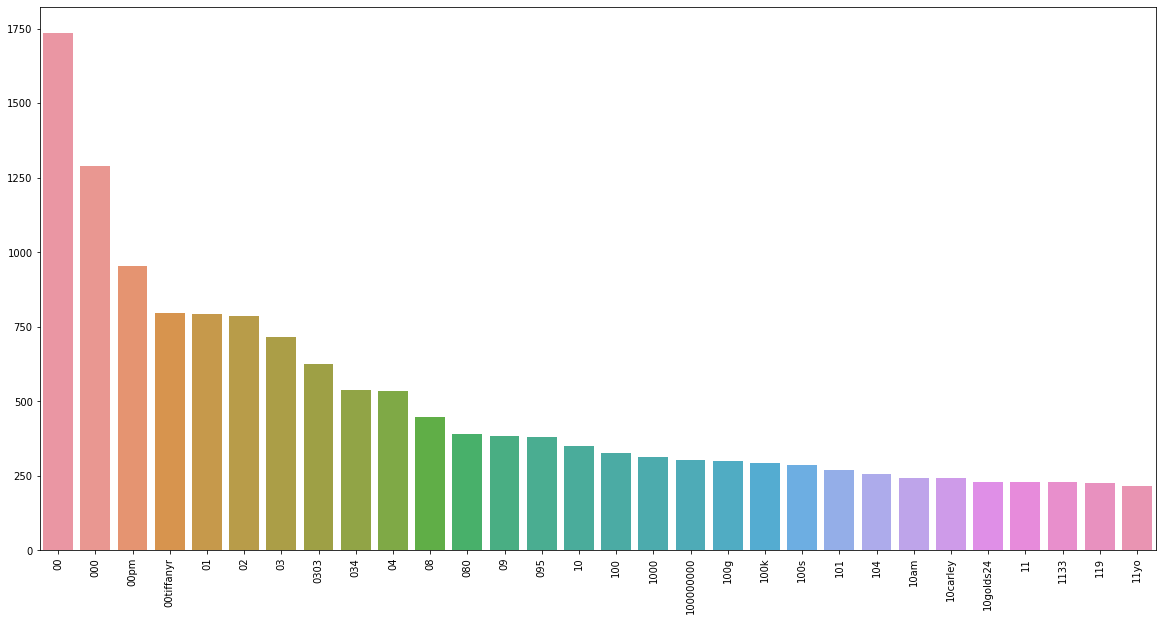

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
# Answer here
cv = CountVectorizer()
cv_train=cv.fit_transform(train_df['text'])
train_word_list = cv.get_feature_names();  
train_count_list = cv_train.toarray().sum(axis=0)  
sorted_index = np.argsort(-train_count_list)
x_vect = np.asarray(cv.get_feature_names())

g = sns.barplot(x=x_vect[sorted_index[:30]], 
            y=train_count_list[sorted_index[:30]])
g.set_xticklabels(cv.get_feature_names()[:30], rotation = 90);
g.figure.set_size_inches(20,10)







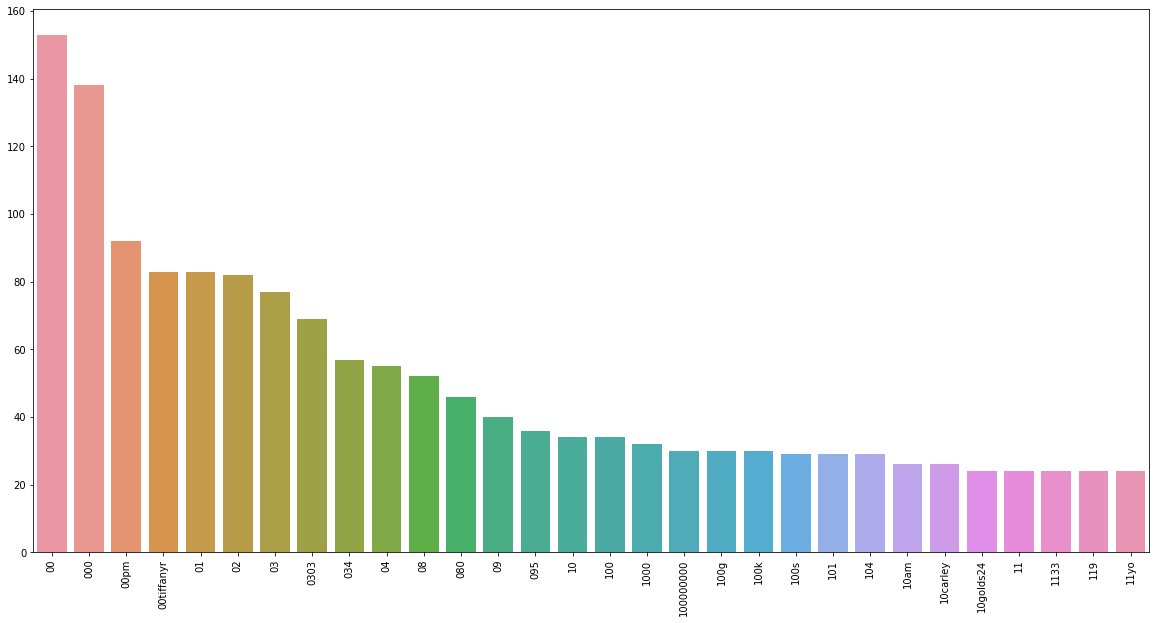

In [3]:
cv_test=cv.transform(test_df['text'])
test_word_list = cv.get_feature_names();  
test_count_list = cv_test.toarray().sum(axis=0)  
sorted_index = np.argsort(-test_count_list)

x_vect = np.asarray(cv.get_feature_names())

g1 = sns.barplot(x=x_vect[sorted_index[:30]], 
            y=test_count_list[sorted_index[:30]])
g1.set_xticklabels(cv.get_feature_names()[:30], rotation = 90);
g1.figure.set_size_inches(20,10)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text']).toarray() 
tfidf_vectorizer.get_feature_names()[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
#在anger的data中被預測為sadness有9筆, joy有5筆, fear有15筆, anger有55筆
#在fear的data中被預測為sadness有14筆, joy有13筆, fear有70筆, anger有16筆
#在joy的data中被預測為sadness有9筆, joy有54筆, fear有9筆, anger有9筆
#在sadness的data中被預測為sadness有42筆, joy有7筆, fear有16筆, anger有4筆

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\users\kevin79577\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [9]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.69


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

When we review the training results of Decision Tree model , the training accuracy score of the decision tree model is 0.99, while the test data result is only 0.66. It seems that the decision tree model is over-fitting and has poor performance on the test data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


In [16]:
from sklearn.tree import DecisionTreeClassifier
import keras


# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [17]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3258    sadness
2358        joy
1217       fear
1904       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [19]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [20]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

In [22]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3589 - accuracy: 0.3329 - val_loss: 1.2736 - val_accuracy: 0.4179
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 1.1081 - accuracy: 0.6066 - val_loss: 0.9402 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.7806 - val_loss: 0.7809 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8583 - val_loss: 0.7824 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8798 - val_loss: 0.7883 - val_accuracy: 0.7089
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9091 - val_loss: 0.8721 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9226 - val_loss: 0.8851 - val_accuracy: 0.6830
Epoch 

In [24]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357598,1.332735,0.417867,1.273603
1,1,0.636867,1.012044,0.665706,0.940164
2,2,0.785497,0.603749,0.700288,0.780876
3,3,0.845281,0.433205,0.706052,0.782405
4,4,0.871021,0.350591,0.708934,0.788291
5,5,0.899253,0.288830,0.691643,0.872090
6,6,0.914476,0.236440,0.682997,0.885066
7,7,0.936895,0.197970,0.691643,0.923639
8,8,0.947966,0.167950,0.691643,1.043917
9,9,0.953501,0.148558,0.682997,1.052362


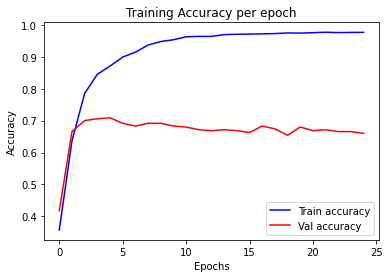

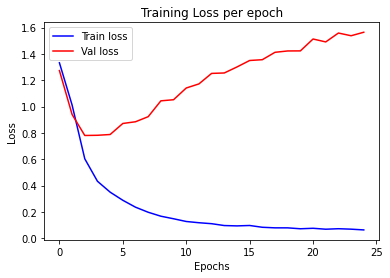

In [27]:
epoch = training_log.iloc[:,0]
acc = training_log.iloc[:,1]
loss = training_log.iloc[:,2]
val_acc = training_log.iloc[:,3]
val_loss = training_log.iloc[:,4]

plt.plot(acc,'b-',label="Train accuracy")
plt.plot(val_acc,'r-',label="Val accuracy")
plt.title(u'Training Accuracy per epoch')
plt.xlabel(u'Epochs')
plt.ylabel(u'Accuracy')

plt.legend()
plt.show()

plt.plot(loss,'b-',label="Train loss")
plt.plot(val_loss,'r-',label="Val loss")

plt.title(u'Training Loss per epoch')
plt.xlabel(u'Epochs')
plt.ylabel(u'Loss')

plt.legend()

plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
    May be we can cut every vacabularies of sentenses in the beginning  
ex: most_similar(happy, topn=10) 
    "Today is my birthday" is the sentence we want to seperate every words of that, afterward 
    Today = A    we abstrat A for (today,0.50033) 
    is = B       we abstrat B for (is,0.41033) 
    my = C       we abstrat C for (my,0.62033) 
    birthday = D we abstrat D for (birthday,0.95033) 
then we got the closest score D which reach the score 10 (happy) highestly 
and we could regard the emotion of this sentence as "happy"  




### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Third Part
We apply three kinds of process



1. TFIDF + LinearSVC

In [ ]:
import json
import pandas as pd
identification_csv = pd.read_csv("../input/dm2020-hw2-nthu/data_identification.csv")
emotion_csv = pd.read_csv("../input/dm2020-hw2-nthu/emotion.csv")

values = []
with open('../input/dm2020-hw2-nthu/tweets_DM.json', 'r') as tweet_data:
    for line in tweet_data.readlines():
        k = json.loads(line)
        values.append(k['_source']['tweet'])  ## 轉成json陣列 以方便可以直接轉成dataFrame

In [ ]:
raw_data = pd.DataFrame(values) 
print(raw_data)
raw_data = raw_data.sort_values(by=['tweet_id']) ## 依照tweet_id 做排序
identification_csv = identification_csv.sort_values(by=['tweet_id'])
ident_dict = identification_csv.set_index('tweet_id')['identification'].to_dict()## 將dataframe轉成dict 為了取出value的陣列
raw_data['identification'] = ident_dict.values() ## 直接加入陣列在新的column
raw_data

In [ ]:
## 依照'identification'的label做篩選 找出trainingData 和 testData
df_train = raw_data.loc[lambda raw_data: raw_data['identification'] == 'train',:]
df_test = raw_data.loc[lambda raw_data: raw_data['identification'] == 'test',:]

## 把emotion在df_train中加入新的column
df_train = df_train.sort_values(by=['tweet_id'])
emotion_csv = emotion_csv.sort_values(by=['tweet_id'])
emotion_dict = emotion_csv.set_index('tweet_id')['emotion'].to_dict()
df_train['emotion'] = emotion_dict.values()
print(df_train.shape)
df_train

In [ ]:
## save as pickle file
df_train.to_pickle("/kaggle/working/train_df.pkl") 
df_test.to_pickle("/kaggle/working/test_df.pkl") 


In [ ]:
import pandas as pd
# load a pickle file
train_df = pd.read_pickle("../input/tt-pickle-file/train_df.pkl")[:-5000]
test_df =  pd.read_pickle("../input/tt-pickle-file/train_df.pkl")[-5000:]
final_test_df = pd.read_pickle("../input/tt-pickle-file/test_df.pkl")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text']) 
y_train = train_df['emotion']
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Train model
tfidf_svc.fit(X_train_tfidf, y_train)

# Run predict on tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(X_test_tfidf)

# Calculate accuracy using the metrics module
tfidf_svc_score = tfidf_svc.score(X_test_tfidf, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

In [ ]:
final_X_test_tfidf = tfidf_vectorizer.transform(final_test_df['text'])
final_tfidf_svc_pred = tfidf_svc.predict(final_X_test_tfidf)

final_test_df['emotion'] = final_tfidf_svc_pred
csvData = final_test_df[['tweet_id','emotion']].to_csv('/kaggle/working/predict_01.csv',header=['id','emotion'],index=False) 

### Third Part
2. bow + DT

In [ ]:
import json
import pandas as pd
identification_csv = pd.read_csv("../input/data-provided/data_identification.csv")
emotion_csv = pd.read_csv("../input/data-provided/emotion.csv")
with open('../input/tweets/tweets_DM.json', 'r') as tweet_data:
    values = [json.loads(line)['_source']['tweet'] for line in tweet_data.readlines() ]
    

In [ ]:
raw_data = pd.DataFrame(values)
raw_data = raw_data.sort_values(by=['tweet_id'])
identification_csv = identification_csv.sort_values(by=['tweet_id'])
ident_dict = identification_csv.set_index('tweet_id')['identification'].to_dict()
raw_data['identification'] = ident_dict.values()


In [ ]:
df_train = raw_data.loc[lambda raw_data: raw_data['identification'] == 'train',:]
df_test = raw_data.loc[lambda raw_data: raw_data['identification'] == 'test',:]

df_train = df_train.sort_values(by=['tweet_id'])
emotion_csv = emotion_csv.sort_values(by=['tweet_id'])
emotion_dict = emotion_csv.set_index('tweet_id')['emotion'].to_dict()
df_train['emotion'] = emotion_dict.values()
print(df_train.shape)
df_train

In [ ]:
## save as pickle file
df_train.to_pickle("/kaggle/working/train_df.pkl") 
df_test.to_pickle("/kaggle/working/test_df.pkl") 
df_train

In [ ]:
import pandas as pd
# load a pickle file
train_df = pd.read_pickle("../input/pickle-data/train_df.pkl")[:-1000]
test_df =  pd.read_pickle("../input/pickle-data/train_df.pkl")[-1000:]
final_test_df = pd.read_pickle("../input/pickle-data/test_df.pkl")
final_test_df.shape
final_test_df.head()
print(train_df.shape)
train_df.dropna(inplace=True)
print(train_df.shape)
print(test_df.shape)
test_df.dropna(inplace=True)
print(test_df.shape)
train_df

In [ ]:
### generate feature_Bow ###

from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'][:20000])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'][:20000])

## check dimension
train_data_BOW_features_500.shape

In [ ]:
### generate X_train X_test ###

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
### build Desicion Model ###
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

In [ ]:
### accuracy ###
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

In [ ]:
X_train = BOW_500.transform(final_test_df['text'])
final_train_pred = DT_model.predict(X_train)

final_test_df['emotion'] = final_train_pred
csvData = final_test_df[['tweet_id','emotion']].to_csv('/kaggle/working/predict.csv',header=['id','emotion'],index=False) 
final_train_pred

### Third Part
3. TFIDF + DNN

In [ ]:
import pandas as pd
# load a pickle file
train_df = pd.read_pickle("../input/pickle-data/train_df.pkl")[:-1000]
test_df =  pd.read_pickle("../input/pickle-data/train_df.pkl")[-1000:]
final_test_df = pd.read_pickle("../input/pickle-data/test_df.pkl")

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text']).toarray() 
y_train = train_df['emotion']
X_test_tfidf = tfidf_vectorizer.transform(test_df['text']).toarray() 
y_test = test_df['emotion']


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
import keras
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:]:\n', y_train[0:])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:]:\n', y_train[0:])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# I/O check
input_shape = X_train_tfidf.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=1024)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=1024)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('/kaggle/working/training_log.csv')

# training setting
epochs = 10
batch_size = 128

# training!
history = model.fit(X_train_tfidf, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test_tfidf, y_test))
print('training finish')

In [ ]:
import numpy as np
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]
pred_result = label_decode(label_encoder, pred_result)

from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [ ]:
final_X_test = tfidf_vectorizer.transform(final_test_df['text']).toarray() 
final_pred_result = model.predict(final_X_test, batch_size=128)
final_pred_result = label_decode(label_encoder, final_pred_result)
final_test_df['emotion'] = final_pred_result
csvData = final_test_df[['tweet_id','emotion']].to_csv('/kaggle/working/predict.csv',header=['id','emotion'],index=False) 